Użyj danych advertising.csv.
.5 pkt Przeprowadź analizę i przygotowanie danych, wzorując się na zadaniach 1 i 2.
.5 kpt "Zbuduj modele regresji liniowej na danych, w których skala zmiennych jest zachowana i na
danych znormalizowanych.
.5 pkt Porównaj te dwa modele, zapisz obserwacje i wnioski.
.5 pkt Wskaż najlepszy model do ewaluacji na zbiorze testowym udostępnionym w trakcie ćwiczeń.

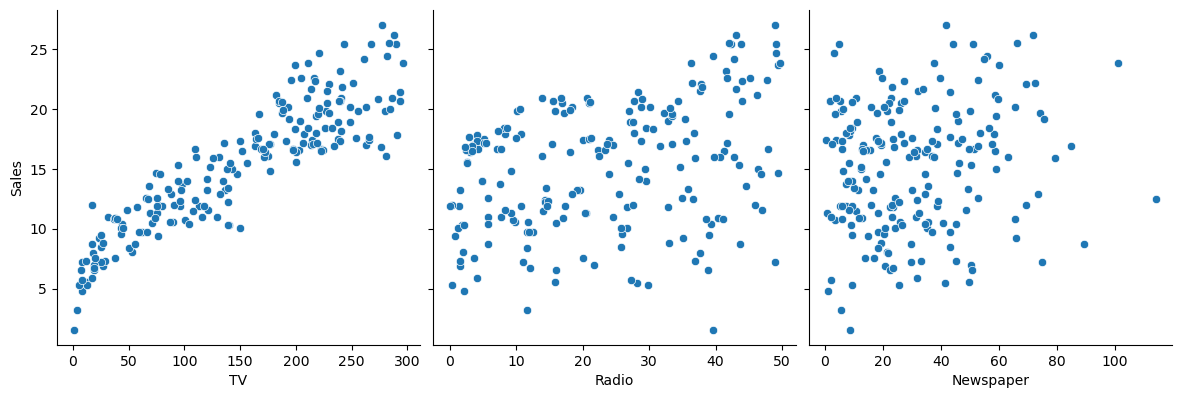

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

data = pd.read_csv("advertising.csv")
sb.pairplot(data, x_vars=["TV","Radio","Newspaper"], y_vars="Sales", height=4, kind="scatter")
plt.show()


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def preprocess_advertising(X, y, newspapers = True, radio = True):
    mean_y = y.mean()
    std_y  = y.std()
    work_data = X.copy()
    work_data["y"] = y.values

    f = (work_data["y"] >= mean_y - 3*std_y) & (work_data["y"] <= mean_y + 3*std_y)
    filtered_data = work_data[f].reset_index(drop=True)
    if (newspapers and radio):
        X_clean = filtered_data[["TV","Radio","Newspaper"]]
    elif (radio):
        X_clean = filtered_data[["TV", "Radio"]]
    elif (newspapers):
        X_clean = filtered_data[["TV", "Newspaper"]]
    else:
        X_clean = filtered_data[["TV"]]
    Y_clean = filtered_data["y"]

    scaler = StandardScaler()
    X_normalized = pd.DataFrame(scaler.fit_transform(X_clean), columns=X_clean.columns)

    return X_clean, Y_clean, X_normalized


X = data[["TV","Radio","Newspaper"]]
X_no_newspapers = data[["TV", "Radio"]]
X_TV = data[["TV"]]
Y = data["Sales"]

X_clean, Y_clean, X_normalized = preprocess_advertising(X, Y)
X_clean_no_news, Y_clean_no_news, X_normalized_no_news = preprocess_advertising(X_no_newspapers, Y, False)
X_clean_TV, Y_clean_TV, X_normalized_TV = preprocess_advertising(X_TV, Y, False, False)

X_train, X_test, Y_train, Y_test = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=42)
X_train_normalized, X_test_normalized, Y_train_normalized, Y_test_normalized = train_test_split(X_normalized, Y_clean, test_size=0.2, random_state=42)
X_train_no_news, X_test_no_news, Y_train_no_news, Y_test_no_news = train_test_split(X_clean_no_news, Y_clean_no_news, test_size=0.2, random_state=42)
X_train_TV, X_test_TV, Y_train_TV, Y_test_TV = train_test_split(X_clean_TV, Y_clean_TV, test_size=0.2, random_state=42)

# Regresja po preprocessingu
linreg_raw = LinearRegression()
linreg_raw.fit(X_train, Y_train)
r2_raw = r2_score(Y_test, linreg_raw.predict(X_test))

# Regresja po preprocessingu i normalizacji
linreg_normalized = LinearRegression()
linreg_normalized.fit(X_train_normalized, Y_train_normalized)
r2_normalized = r2_score(Y_test_normalized, linreg_normalized.predict(X_test_normalized))

# Regresja po preprocessingu, ale bez brania pod uwagę newspaper 
linreg_no_newspapers = LinearRegression()
linreg_no_newspapers.fit(X_train_no_news, Y_train_no_news)
r2_no_news = r2_score(Y_test_no_news, linreg_no_newspapers.predict(X_test_no_news))

# Regresja po preprocessingu z samym TV
linreg_TV = LinearRegression()
linreg_TV.fit(X_train_TV, Y_train_TV)
r2_TV = r2_score(Y_test_TV, linreg_TV.predict(X_test_TV))

print(f"R2 score modelu nieznormalizowanego: {r2_raw} \n\
R2 score modelu znormalizowanego: {r2_normalized} \n\
R2 score modelu bez newspapers: {r2_no_news} \n\
R2 score modelu z samym TV: {r2_TV}")

R2 score modelu nieznormalizowanego: 0.9059011844150826 
R2 score modelu znormalizowanego: 0.9059011844150825 
R2 score modelu bez newspapers: 0.9078797802624651 
R2 score modelu z samym TV: 0.802561303423698


Użyj danych data4.csv.
.5 pkt Przeanalizuj dostarczone dane.

1 pkt Dla podanych danych zbuduj dwa modele: standardową regresję liniową oraz z użyciem regu-
laryzacji w normie L2 z odpowiednim hiperparametrem λ2.

1 pkt Porównaj otrzymane parametry regresji oraz skuteczność na zbiorze testowym. Który model
zadziałał lepiej i dlaczego (podaj obserwacje i teoretyczne uzasadnienie)?
.5 pkt Sprawdź skuteczność modelu na udostępnionym w trakcie zajęć zbiorze danych.

In [9]:
data2 = pd.read_csv("data4.csv")
X = data2.drop("y", axis=1)
Y = data2["y"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardowa regresja
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
r2_lin = r2_score(Y_test, linreg.predict(X_test))

print(f"R2 Score standardowej regresji na danych data4.csv:    {r2_lin}")

# Regresja z regularyzacją L2
from sklearn.linear_model import RidgeCV

alphas = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
#alphas = [2.0]
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, Y_train)
best_alpha = ridge_cv.alpha_
print(f"Najlepszy alpha: {best_alpha}")
r2_ridge = r2_score(Y_test, ridge_cv.predict(X_test))
print(f"R2 Score regresji z regularyzacją na danych data4.csv: {r2_ridge}")

coef_lin = pd.Series(linreg.coef_, index=X.columns)
coef_ridge = pd.Series(ridge_cv.coef_, index=X.columns)

comparison = pd.DataFrame({
    "Linear": coef_lin,
    "Ridge": coef_ridge
})

print("Porównanie współczynników:")
print(comparison)


R2 Score standardowej regresji na danych data4.csv:    0.9689854069305857
Najlepszy alpha: 0.01
R2 Score regresji z regularyzacją na danych data4.csv: 0.9689826670208709
Porównanie współczynników:
        Linear      Ridge
x0    8.896418   8.892633
x1   -0.691715  -0.690681
x2   39.192961  39.183783
x3    0.493923   0.496132
x4   -1.762855  -1.760647
x5    0.490762   0.488471
x6   10.385491  10.381678
x7   -1.110342  -1.108625
x8   79.139541  79.125792
x9   38.390511  38.388947
x10  -2.138832  -2.139716
x11  -1.729409  -1.727669
x12  -2.388691  -2.386516
x13   1.096705   1.095942
x14   1.023809   1.024386
x15  -2.207332  -2.209472
x16   0.580804   0.579255
x17   0.053509   0.053630
x18   1.315810   1.316809
x19  -1.964419  -1.962811
